### Dataset
Lets Load the dataset. We shall use the following datasets:

Features are in: "sido0_train.mat"

Labels are in: "sido0_train.targets"

In [2]:
from scipy.io import loadmat
import numpy as np

X = loadmat(r"sido0_matlab/sido0_train.mat")
y = np.loadtxt(r"sido0_matlab/sido0_train.targets")

# Statistics of the Dense Format of X
X = X['X'].todense()
print(X.shape)

(12678, 4932)


### Logistic Regression Definition
Lets use the Logistic Regression definition we previously used


In [3]:
def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    n = X.shape[1]
    Xw = np.dot(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(np.multiply(w,w))
    gMul = 1/(1 + np.exp(yXw))
    ymul = -1*np.multiply(yT, gMul)
    g =  np.dot(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    g = g.reshape(-1,1)
    return [f, g]
        

### Gradient Descent
Lets now define the most basic version of Gradient Descent and tune the learning rate!

In [4]:
from numpy import linalg as LA

def gd(funObj,w,maxEvals,alpha,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    while(1):
        [f,g] = funObj(w,X,y,lam)
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print("FunEvals: " + str(funEvals) + ", alpha = " + str(alpha) + ", Function Value = " + str(f) + "Opt Cond: " + str(optCond))
        w = w - alpha*g
        funEvals = funEvals+1
        if (optCond < 1e-2):
            break
        if (funEvals > maxEvals):
            break
        funVals.append(f)
    return funVals

[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))

### Lets run it!
Now let us run it for alpha = 1e-1

In [5]:
funV = gd(LogisticLoss,w,200,1e-1,X,y,1,1,10)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


FunEvals: 10, alpha = 0.1, Function Value = 5132063.161701623Opt Cond: 594.7900993231987
FunEvals: 20, alpha = 0.1, Function Value = 5085321.830353418Opt Cond: 546.6790555705702
FunEvals: 30, alpha = 0.1, Function Value = 24321340.625333373Opt Cond: 12226.34772708299
FunEvals: 40, alpha = 0.1, Function Value = 11052026.426141273Opt Cond: 1005.5533604885051
FunEvals: 50, alpha = 0.1, Function Value = 7229048.443102302Opt Cond: 573.5293211025089
FunEvals: 60, alpha = 0.1, Function Value = 1606445.8316171337Opt Cond: 1249.289114529055
FunEvals: 70, alpha = 0.1, Function Value = 1363489.0510592207Opt Cond: 373.9702224577259
FunEvals: 80, alpha = 0.1, Function Value = 11981093.247856414Opt Cond: 529.4110641081884
FunEvals: 90, alpha = 0.1, Function Value = 16081776.095875744Opt Cond: 638.2768487047542
FunEvals: 100, alpha = 0.1, Function Value = 17059147.778465725Opt Cond: 9329.152883638555
FunEvals: 110, alpha = 0.1, Function Value = 9282296.175946847Opt Cond: 1267.2767695203215
FunEvals: 

### Learning Rate is too large!
Lets try alpha = 1e-3

In [6]:
funV = gd(LogisticLoss,w,200,1e-3,X,y,1,1,10)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


FunEvals: 10, alpha = 0.001, Function Value = 78660.15024615564Opt Cond: 455.22013340110016
FunEvals: 20, alpha = 0.001, Function Value = 88365.55162812797Opt Cond: 455.3150253545914
FunEvals: 30, alpha = 0.001, Function Value = 61641.29178991578Opt Cond: 440.4447073973744
FunEvals: 40, alpha = 0.001, Function Value = 82917.20789706903Opt Cond: 454.9025368684714
FunEvals: 50, alpha = 0.001, Function Value = 26925.864885981027Opt Cond: 321.87406865073325
FunEvals: 60, alpha = 0.001, Function Value = 69087.74150170013Opt Cond: 454.33904004862137
FunEvals: 70, alpha = 0.001, Function Value = 20633.56802768407Opt Cond: 297.33797745381435
FunEvals: 80, alpha = 0.001, Function Value = 20929.828598337364Opt Cond: 310.5268302945083
FunEvals: 90, alpha = 0.001, Function Value = 13195.810120396301Opt Cond: 657.0075370445511
FunEvals: 100, alpha = 0.001, Function Value = 59107.24736602319Opt Cond: 452.9364941209609
FunEvals: 110, alpha = 0.001, Function Value = 11001.20424797948Opt Cond: 522.5047

#### Still diverging a little. Lets reduce it further!

In [7]:
funV = gd(LogisticLoss,w,200,1e-4,X,y,1,1,10)

FunEvals: 10, alpha = 0.0001, Function Value = 6901.971816348055Opt Cond: 442.2946247522974
FunEvals: 20, alpha = 0.0001, Function Value = 7632.051967689183Opt Cond: 450.5144489212817
FunEvals: 30, alpha = 0.0001, Function Value = 4115.821135614717Opt Cond: 373.75869102050234
FunEvals: 40, alpha = 0.0001, Function Value = 2041.566354257644Opt Cond: 315.13916194672123
FunEvals: 50, alpha = 0.0001, Function Value = 2923.105998291606Opt Cond: 335.17401442794716
FunEvals: 60, alpha = 0.0001, Function Value = 4564.452957920106Opt Cond: 427.2332253258983
FunEvals: 70, alpha = 0.0001, Function Value = 1122.94675206684Opt Cond: 61.1489219527397
FunEvals: 80, alpha = 0.0001, Function Value = 1533.553491262663Opt Cond: 483.1572029469825
FunEvals: 90, alpha = 0.0001, Function Value = 1050.0624073636566Opt Cond: 224.36647856711548
FunEvals: 100, alpha = 0.0001, Function Value = 1166.508010330169Opt Cond: 339.7535493408738
FunEvals: 110, alpha = 0.0001, Function Value = 785.1383560402273Opt Cond: 6

#### Lets reduce it even lower!

In [8]:
funV = gd(LogisticLoss,w,200,1e-5,X,y,1,1,10)

FunEvals: 10, alpha = 1e-05, Function Value = 1213.4743201114695Opt Cond: 114.68153126393145
FunEvals: 20, alpha = 1e-05, Function Value = 1131.4844387092353Opt Cond: 90.04707758512986
FunEvals: 30, alpha = 1e-05, Function Value = 1083.7563505555165Opt Cond: 72.60196962998849
FunEvals: 40, alpha = 1e-05, Function Value = 1050.7099921961803Opt Cond: 60.832705300734666
FunEvals: 50, alpha = 1e-05, Function Value = 1025.6543231061964Opt Cond: 52.22614904403128
FunEvals: 60, alpha = 1e-05, Function Value = 1005.5325735481615Opt Cond: 45.61185402029006
FunEvals: 70, alpha = 1e-05, Function Value = 988.6782517600735Opt Cond: 40.356986934455556
FunEvals: 80, alpha = 1e-05, Function Value = 974.0992190976251Opt Cond: 36.0796539374524
FunEvals: 90, alpha = 1e-05, Function Value = 961.1721323263499Opt Cond: 34.215600758836075
FunEvals: 100, alpha = 1e-05, Function Value = 949.4884325878157Opt Cond: 32.747689575741774
FunEvals: 110, alpha = 1e-05, Function Value = 938.7702766898448Opt Cond: 31.48

#### Lets plot the results for different alpha

In [9]:
funV1 = gd(LogisticLoss,w,200,1e-3,X,y,1,0,0)
funV2 = gd(LogisticLoss,w,200,1e-4,X,y,1,0,0)
funV3 = gd(LogisticLoss,w,200,1e-5,X,y,1,0,0)
funV4 = gd(LogisticLoss,w,200,1e-6,X,y,1,0,0)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


Text(0, 0.5, 'Function Value')

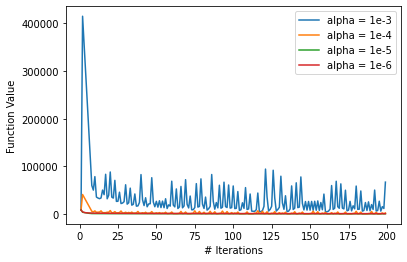

In [10]:
from matplotlib import pyplot as plt
plt.plot(range(1,len(funV1)+1), funV1, label='alpha = 1e-3')
plt.plot(range(1,len(funV2)+1), funV2, label='alpha = 1e-4')
plt.plot(range(1,len(funV3)+1), funV3, label='alpha = 1e-5')
plt.plot(range(1,len(funV4)+1), funV4, label='alpha = 1e-6')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")

Text(0, 0.5, 'Function Value')

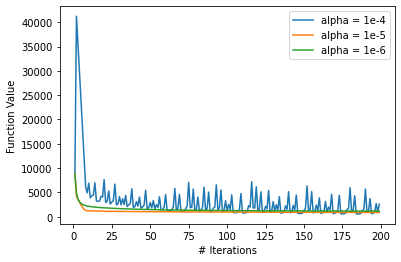

In [11]:
from matplotlib import pyplot as plt
plt.plot(range(1,len(funV2)+1), funV2, label='alpha = 1e-4')
plt.plot(range(1,len(funV3)+1), funV3, label='alpha = 1e-5')
plt.plot(range(1,len(funV4)+1), funV4, label='alpha = 1e-6')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")

Text(0, 0.5, 'Function Value')

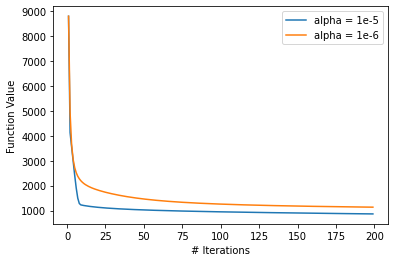

In [12]:
from matplotlib import pyplot as plt
plt.plot(range(1,len(funV3)+1), funV3, label='alpha = 1e-5')
plt.plot(range(1,len(funV4)+1), funV4, label='alpha = 1e-6')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")